<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [2]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [3]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/wwww.csv"
data = pd.read_csv(file_path)
data

,Школьник/студент,Иниц.стиль,Крит.стиль,Упр.стиль,Практ.стиль,Ф.внимания,К.атрибуция,Тол. к противор.,В.изменений,Общий пок. А/Х,...,4. Просмотр видеоуроков,"5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Пол,Возраст
0,0,21,21,21,18,14,6,16,36,72,...,5,5,5,5,5,5,5,5,1,12
1,0,18,21,18,17,24,29,16,27,96,...,5,5,5,5,5,5,5,5,1,12
2,0,19,25,16,24,25,25,24,24,98,...,5,5,5,5,5,5,5,5,1,13
3,0,19,22,18,17,24,24,24,26,98,...,5,5,1,5,1,4,2,2,1,13
4,0,21,21,21,19,20,24,20,23,87,...,3,3,3,4,3,3,2,2,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,18,20,23,21,27,33,26,22,108,...,4,3,3,1,2,2,5,5,0,25
580,1,20,20,18,16,30,25,30,25,110,...,3,3,3,3,3,3,3,3,0,25
581,1,24,23,23,25,26,34,24,24,108,...,4,4,4,3,3,3,5,4,0,25
582,1,20,28,24,24,25,33,28,31,117,...,3,3,2,2,3,1,5,5,1,25


In [ ]:
# describe the data

data.describe()

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,0.537786,1.253076,2.702988,4.826011,0.861160,87.820738,9.050967,1.949033,82.282460,...,2.388401,1.414763,1.71529,1.456942,3.045694,2.427065,0.284710,17.987698,3.681898,1.609842
std,164.400426,0.499009,2.091043,2.098291,2.899665,1.149121,14.685537,2.151613,2.151613,19.560051,...,1.229883,1.410546,1.43269,1.347399,1.060504,1.244158,0.451673,2.875012,0.840673,0.583495
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,0.000000,18.180000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000
25%,143.000000,0.000000,0.000000,1.000000,3.000000,0.000000,80.000000,8.000000,0.000000,72.730000,...,1.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,16.000000,3.000000,1.000000
50%,285.000000,1.000000,0.000000,2.000000,5.000000,0.000000,90.000000,10.000000,1.000000,90.910000,...,3.000000,1.000000,2.00000,1.000000,3.000000,2.000000,0.000000,18.000000,4.000000,2.000000
75%,427.000000,1.000000,2.000000,4.000000,7.000000,1.000000,100.000000,11.000000,3.000000,100.000000,...,3.000000,2.000000,3.00000,2.000000,4.000000,3.000000,1.000000,20.000000,4.000000,2.000000
max,569.000000,1.000000,10.000000,10.000000,10.000000,7.000000,100.000000,11.000000,9.000000,100.000000,...,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,1.000000,26.000000,5.000000,3.000000


In [5]:
# variable names

data.keys()

Index(['Школьник/студент', 'Иниц.стиль', 'Крит.стиль', 'Упр.стиль',
       'Практ.стиль', 'Ф.внимания', 'К.атрибуция', 'Тол. к противор.',
       'В.изменений', 'Общий пок. А/Х', 'Акт.', 'Рефл.', 'А-К', 'Чув.', 'Инт.',
       'Ч-И', 'Виз.стиль', 'Верб.стиль', 'Виз.-Верб.', 'Ан.', 'Син.', 'А-С',
       'Обуч.', 'Р.уч.акт.', 'Проц.навыки', 'Металл.', 'Метка.контроль',
       'Сниж.рефл', 'Степ.осозн.', 'Уч.знания', 'Неуч.знания',
       'Уч.и Неуч. Знания', 'Комп.знания', 'Ответств.', 'Комп. Умения',
       'Контент', 'Техносфера', 'Коммуникация', 'Потребление',
       '1. Использование смартфона помогает мне расслабиться, когда я взволнован(а) или расстроен(а).',
       '2. Использование смартфона помогает мне снять напряжение, когда я устал(а) и хочу отдохнуть.',
       '3. С помощью смартфона я могу хотя бы на время отвлечься от ежедневных обязанностей и забот.',
       '4. Использование смартфона помогает мне общаться с людьми, когда я чувствую себя одиноким(кой).',
       '5. Исполь

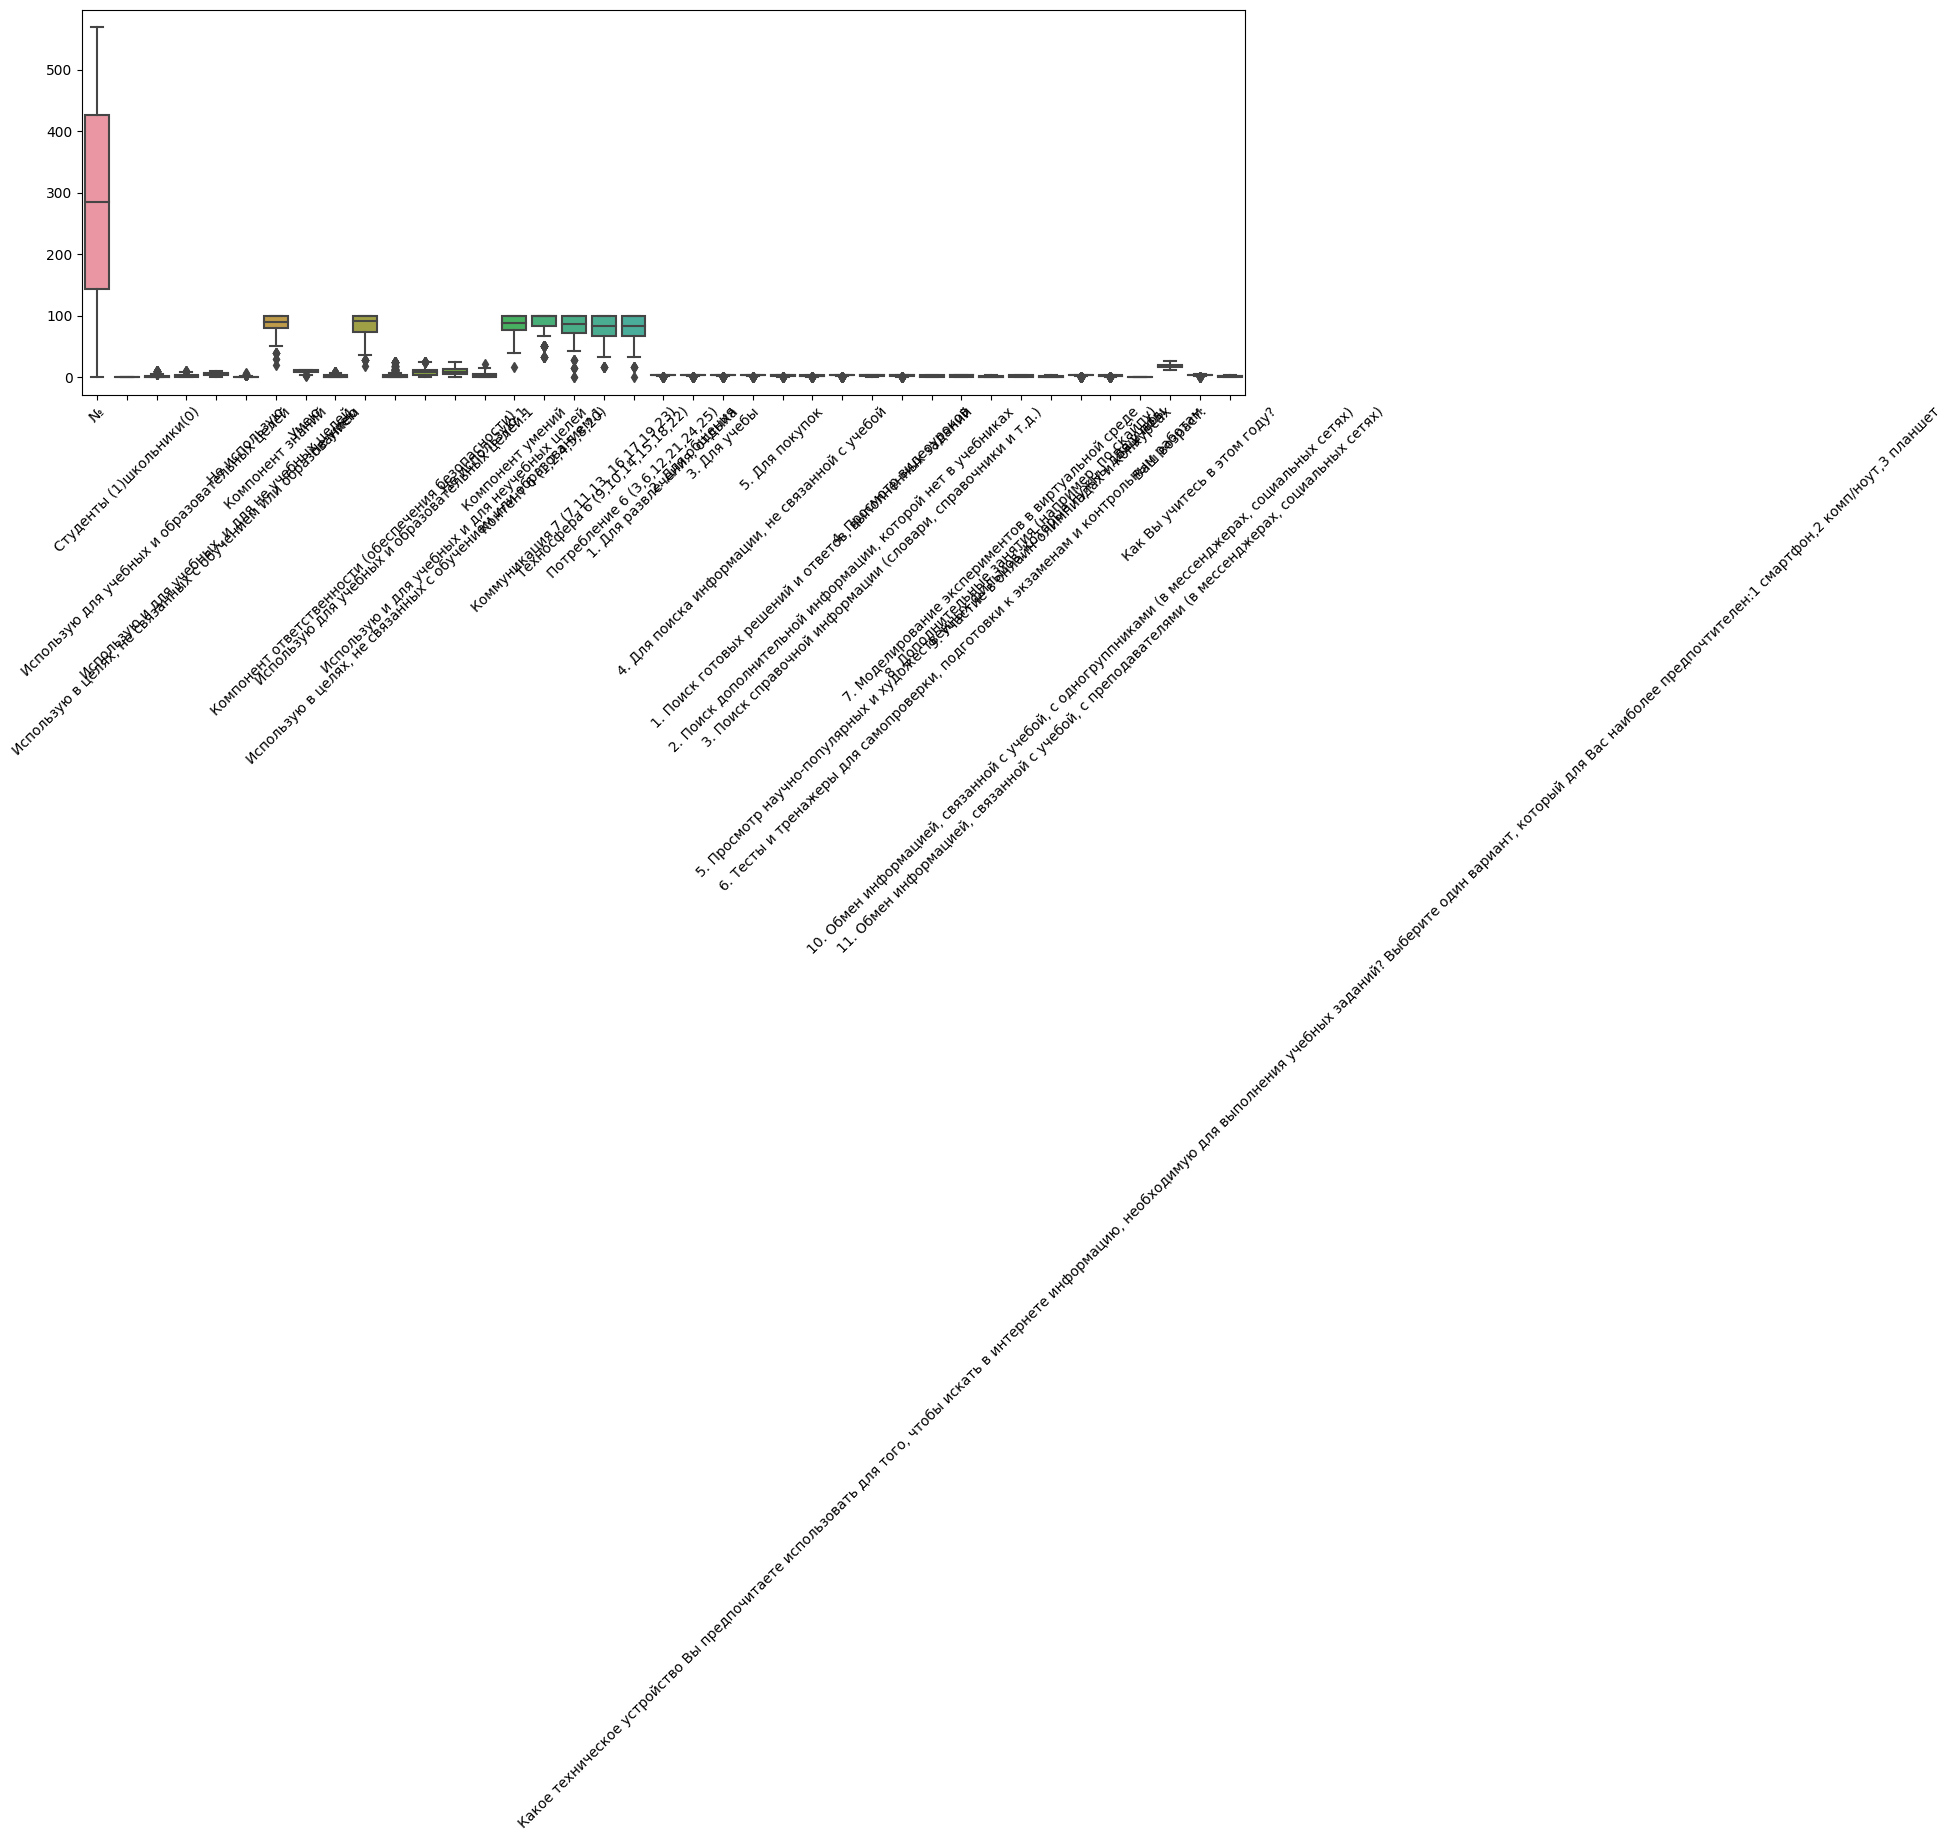

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

# Logistic regression

In [6]:
import statsmodels.api as sm

In [9]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data[ 'Школьник/студент'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data[ 'Школьник/студент'] > binthresh
data


,Школьник/студент,Иниц.стиль,Крит.стиль,Упр.стиль,Практ.стиль,Ф.внимания,К.атрибуция,Тол. к противор.,В.изменений,Общий пок. А/Х,...,"5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Пол,Возраст,binquality
0,0,21,21,21,18,14,6,16,36,72,...,5,5,5,5,5,5,5,1,12,False
1,0,18,21,18,17,24,29,16,27,96,...,5,5,5,5,5,5,5,1,12,False
2,0,19,25,16,24,25,25,24,24,98,...,5,5,5,5,5,5,5,1,13,False
3,0,19,22,18,17,24,24,24,26,98,...,5,1,5,1,4,2,2,1,13,False
4,0,21,21,21,19,20,24,20,23,87,...,3,3,4,3,3,2,2,0,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,18,20,23,21,27,33,26,22,108,...,3,3,1,2,2,5,5,0,25,True
580,1,20,20,18,16,30,25,30,25,110,...,3,3,3,3,3,3,3,0,25,True
581,1,24,23,23,25,26,34,24,24,108,...,4,4,3,3,3,5,4,0,25,True
582,1,20,28,24,24,25,33,28,31,117,...,3,2,2,3,1,5,5,1,25,True


In [12]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality



xcols = []


for key in data.keys():
  if key in [
       #'Школьник/студент',

       #'Иниц.стиль', 'Крит.стиль', 'Упр.стиль',
       #'Практ.стиль',

       'Ф.внимания', 'К.атрибуция', 'Тол. к противор.',
       #'В.изменений',
       'Общий пок. А/Х',

       #'Акт.', 'Рефл.', 'А-К', 'Чув.', 'Инт.',
       #'Ч-И', 'Виз.стиль', 'Верб.стиль', 'Виз.-Верб.', 'Ан.', 'Син.', 'А-С',

       #'Обуч.', 'Р.уч.акт.',

       #'Проц.навыки', 'Металл.', 'Метка.контроль',
       #'Сниж.рефл',
       #'Степ.осозн.',

       #'Уч.знания', 'Неуч.знания',
       #'Уч.и Неуч. Знания',
       #'Комп.знания',
       #'Ответств.',
       #'Комп. Умения',
       'Контент',
       'Техносфера',
       #'Коммуникация',
       'Потребление',

       #'1. Использование смартфона помогает мне расслабиться, когда я взволнован(а) или расстроен(а).',
       #'2. Использование смартфона помогает мне снять напряжение, когда я устал(а) и хочу отдохнуть.',
       #'3. С помощью смартфона я могу хотя бы на время отвлечься от ежедневных обязанностей и забот.',
       #'4. Использование смартфона помогает мне общаться с людьми, когда я чувствую себя одиноким(кой).',
       #'5. Использование моего смартфона отвлекает мой разум от проблем.',
       #'6. Я трачу на использование смартфона непозволительно много времени.',
       #'7. Я часто продолжаю пользоваться своим смартфоном, несмотря на мысли о том, что было бы лучше прекратить.',
       #'8. Использование смартфона наносит урон моему здоровью и/или эмоциональному благополучию.',
       #'9. Если со мной нет моего смартфона, мысли об этом становятся навязчивыми.',
       #'10. Использование смартфона вредит моей учебе.',

       #'1. Для развлечения, отдыха',
       '2. Для общения',
       '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой', '5. Для покупок',

       #'1. Поиск готовых решений и ответов, выполненных заданий',
       #'2. Поиск дополнительной информации, которой нет в учебниках',
       #'3. Поиск справочной информации (словари, справочники и т.д.)',
       #'4. Просмотр видеоуроков',
       #'5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
       #'6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
       #'7. Моделирование экспериментов в виртуальной среде',
       #'8. Дополнительные занятия (например, по скайпу)',
       #'9. Участие в онлайн-олимпиадах и конкурсах',
       #'10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
       #'11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)',

       #'Пол',
       #'Возраст'
]:
                     xcols.append(key)

xcols

['Ф.внимания',
 'К.атрибуция',
 'Тол. к противор.',
 'Общий пок. А/Х',
 'Контент',
 'Техносфера',
 'Потребление',
 '2. Для общения',
 '3. Для учебы',
 '4. Для поиска информации, не связанной с учебой',
 '5. Для покупок']

In [13]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.595446
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                  584
Model:                          Logit   Df Residuals:                      573
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.1393
Time:                        16:02:46   Log-Likelihood:                -347.74
converged:                       True   LL-Null:                       -404.03
Covariance Type:            nonrobust   LLR p-value:                 1.614e-19
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Ф.внимания                                          0.0727      0.027      2.657      0.008       0.019       0.126
К.атрибуция                                         0.1077      0.025      4.295      0.000       0.059       0.157
Тол. к противор.                                    0.0538      0.026      2.081      0.037       0.003       0.105
Общий пок. А/Х                                     -0.0719      0.017     -4.134      0.000      -0.106      -0.038
Контент                                             0.0018      0.007      0.236      0.813      -0.013       0.016
Техносфера                                         -0.0325      0.006     -5.178      0.000      -0.045      -0.020
Потребление                                         0.0211      0.007      3.032      0.002       0.007       0.035
2. Для общения                                     -0.1762      0.124     -1.416      0.157      -0.420       0.068
3. Для учебы                                        0.8801      0.136      6.449      0.000       0.613       1.148
4. Для поиска информации, не связанной с учебой     0.0097      0.130      0.075      0.940      -0.244       0.264
5. Для покупок                                     -0.2408      0.104     -2.312      0.021      -0.445      -0.037
===================================================================================================================
"""

In [15]:
from IPython.display import display, HTML

In [16]:
# Get the coefficients
coefficients = results.params

# Calculate the odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the odds ratios with corresponding variable names
odds_ratios_df = pd.DataFrame({'Variable': coefficients.index, 'Odds Ratio': odds_ratios.values})

# Display the odds ratios
#print(odds_ratios_df)
display(HTML(odds_ratios_df.to_html()))


,Variable,Odds Ratio
0,Ф.внимания,1.075451
1,К.атрибуция,1.113754
2,Тол. к противор.,1.055285
3,Общий пок. А/Х,0.930643
4,Контент,1.001767
5,Техносфера,0.968009
6,Потребление,1.021275
7,2. Для общения,0.838426
8,3. Для учебы,2.411147
9,"4. Для поиска информации, не связанной с учебой",1.009757


In [ ]:
! pip install matplotlib seaborn pandas


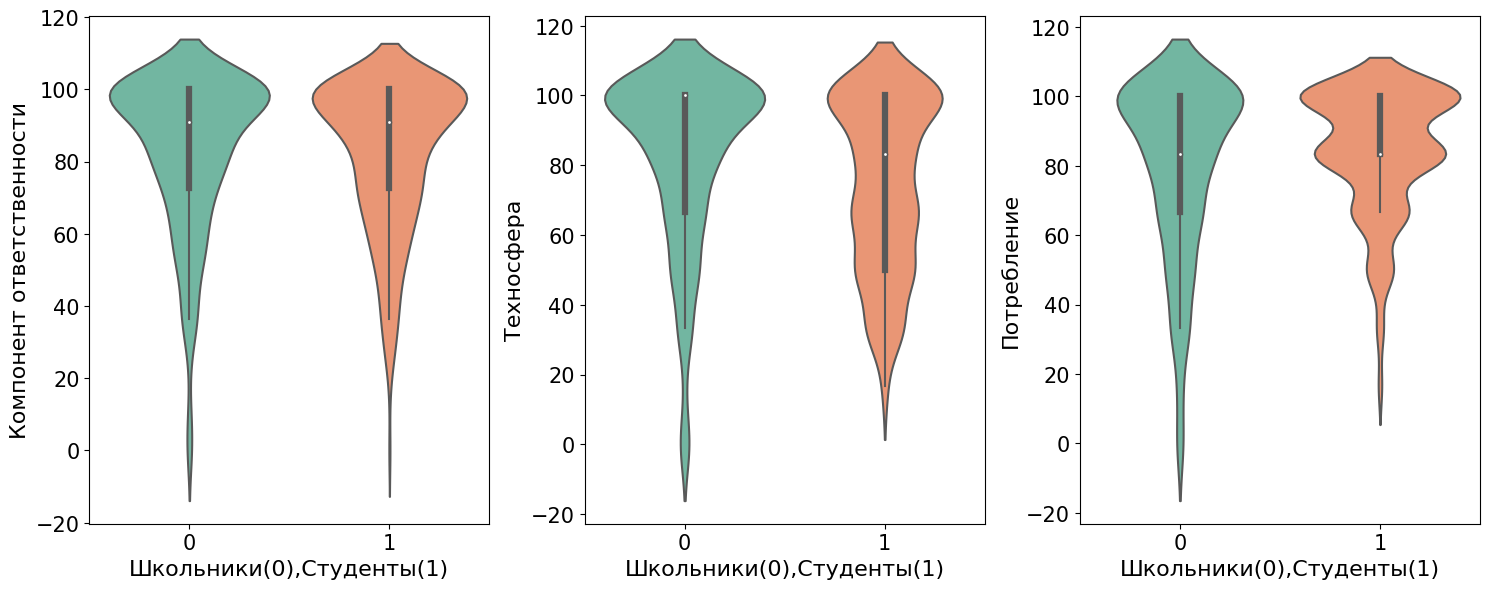

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))


# Second Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Компонент ответственности', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Техносфера 6 (9,10,14,15,18,22)'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Техносфера", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# First Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Потребление 6 (3,6,12,21,24,25)'], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel("Потребление", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size





plt.tight_layout()
plt.show()





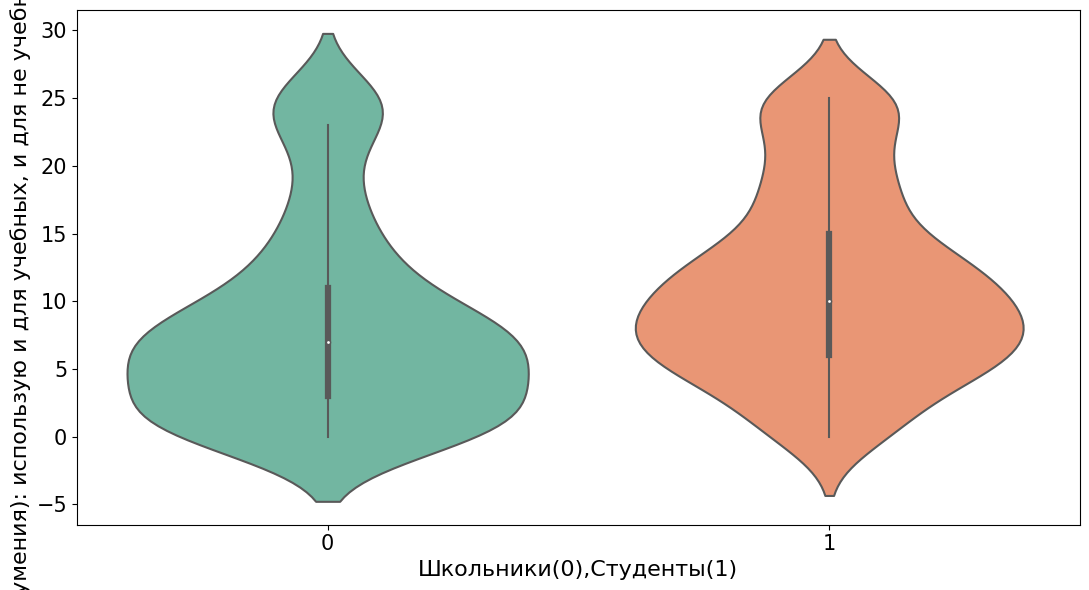

In [ ]:
# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(11, 6))


# Second Plot
plt.subplot(1, 1, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Использую и для учебных и для неучебных целей'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('ИЦК(умения): использую и для учебных, и для не учебных целей', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size



plt.tight_layout()
plt.show()

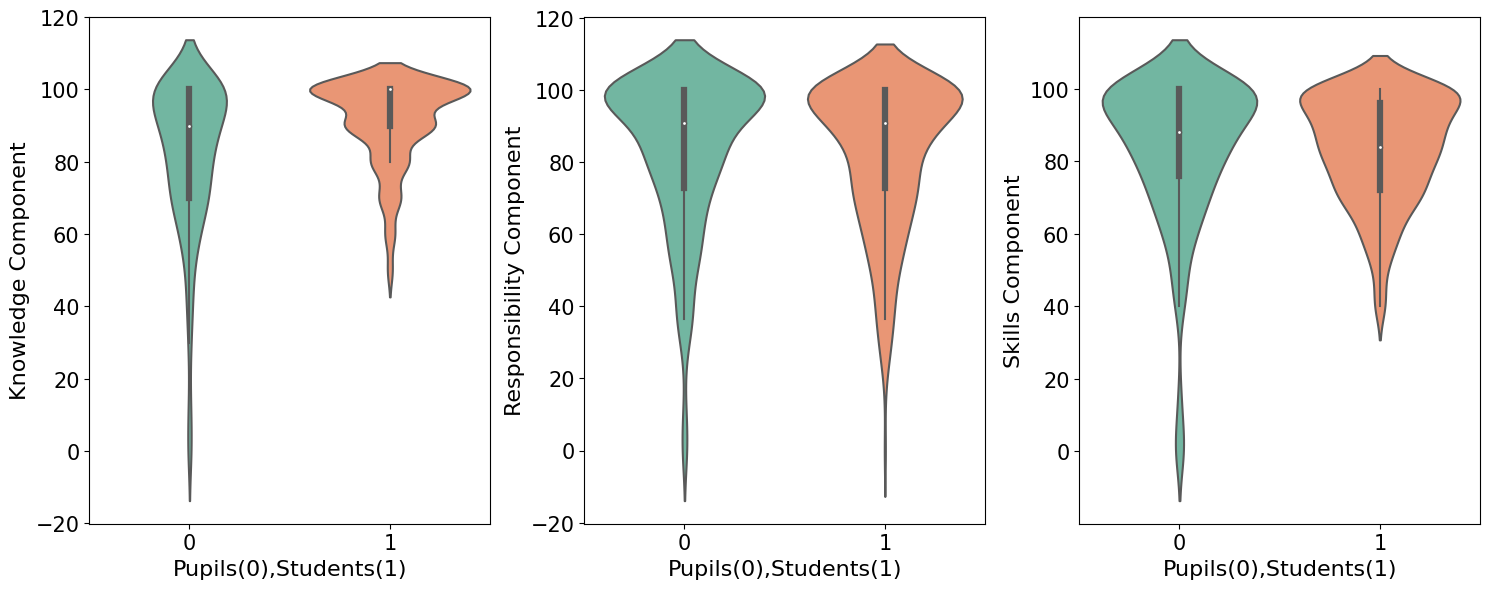

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент знаний'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Knowledge Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент ответственности (обеспечения безопасности) '], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Responsibility Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты (1)школьники(0)'], y=data['Компонент умений'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Pupils(0),Students(1)", fontdict=axis_title_font)
plt.ylabel("Skills Component", fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


plt.tight_layout()
plt.show()


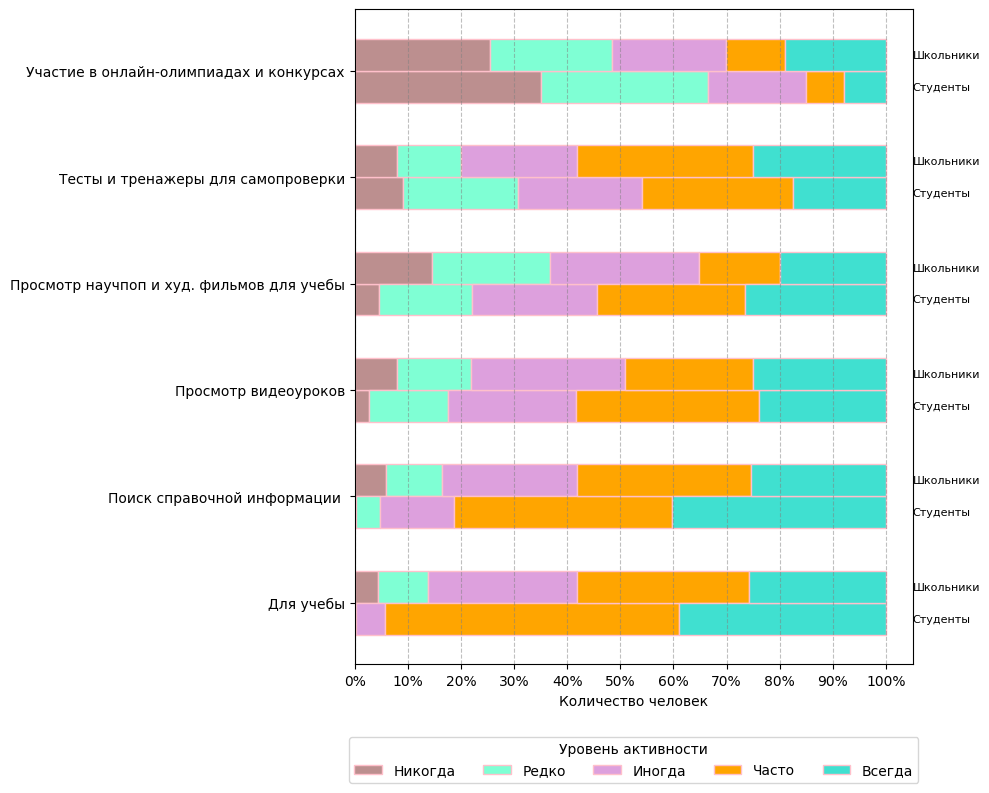

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
activities = [
    'Для учебы',
    'Поиск справочной информации ',
    'Просмотр видеоуроков',
    'Просмотр научпоп и худ. фильмов для учебы',
    'Tесты и тренажеры для самопроверки',
    'Участие в онлайн-олимпиадах и конкурсах',

]

response_labels = ["Никогда", "Редко", "Иногда", "Часто", "Всегда"]
response_colors = ["rosybrown", "aquamarine", "plum", "orange", "turquoise"]

responses_students = np.array([
    [0.00,0.30,5.44, 55.29, 38.97],
    [0.3,4.53,13.9,41.09,40.18],
    [2.72,14.8,24.17,34.44,23.87],
    [4.53,17.52,23.56,27.79,26.59],
    [9.06,21.75,23.26,28.4,17.52],
    [35.05,31.42,18.43,7.25,7.85],
])

responses_schoolchildren = np.array([
    [4.36, 9.45, 28.00, 32.36, 25.82],
    [5.82, 10.55, 25.45, 32.73, 25.45],
    [8.0, 13.82, 29.09, 24.0, 25.09],
    [14.55,22.18,28.0,15.27,20.0],
    [8.0,12.0,21.82,33.09,25.09],
    [25.45,22.91,21.45,11.27,18.91],
])

y = np.arange(len(activities))  # the label locations
height = 0.30 # adjust the height to reduce the space between activity labels
border_color = "pink"  # color for the border of each bar

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here (e.g., figsize=(8, 10))

for i, color in enumerate(response_colors):
    left1 = np.sum(responses_students[:, :i], axis=1)
    left2 = np.sum(responses_schoolchildren[:, :i], axis=1)

    rects1 = ax.barh(y - height/2, responses_students[:, i], height, left=left1, label=response_labels[i], color=color, edgecolor=border_color)
    rects2 = ax.barh(y + height/2, responses_schoolchildren[:, i], height, left=left2, color=color, edgecolor=border_color)

ax.set_xlabel('Количество человек')
ax.set_title('Распределение ответов по группам и активностям')
ax.set_yticks(y)
ax.set_yticklabels(activities)
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])

for percent in np.linspace(0, 100, 11):
    ax.axvline(x=percent, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


#ax.set_xticks(np.arange(0, 101, 20))
#ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
#ax.legend(title="Уровень активности")
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=5)

# Add labels on the side near bars
for j in range(len(activities)):
    ax.text(105, y[j] - height/2, "Студенты", ha='left', va='center', color='black', fontsize=8)
    ax.text(105, y[j] + height/2, "Школьники", ha='left', va='center', color='black', fontsize=8)

# Adjust the bbox_to_anchor parameter to bring the legend title closer
legend = ax.legend(title="Уровень активности", bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=5)


fig.tight_layout()

plt.show()


In [ ]:
# Define the binary variable
binary_variable = 'Студенты (1)школьники(0)'

# Define the Likert scale variables you want to analyze
likert_scale_variables = [
    #'3. Для учебы',
       #'3. Поиск справочной информации (словари, справочники и т.д.)',
       #'4. Просмотр видеоуроков',
       #'5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
       '6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
       '9. Участие в онлайн-олимпиадах и конкурсах',
]

# Create a DataFrame to store the results
results = pd.DataFrame()

# Iterate through the Likert scale variables and calculate percentages based on the binary variable
for variable in likert_scale_variables:
    # Group the data by the binary variable and calculate the value counts for each group
    grouped_data = data.groupby([binary_variable, variable]).size().unstack(fill_value=0)

    # Calculate the percentages for each group
    percentages = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).round(2)

    # Rename the columns for clarity
    percentages.columns = [f'{variable} ({i})' for i in percentages.columns]

    # Store the percentages in the results DataFrame
    results = pd.concat([results, percentages], axis=1)

# Display the results DataFrame as a table
results


,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам (0)","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам (1)","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам (2)","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам (3)","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам (4)",9. Участие в онлайн-олимпиадах и конкурсах (0),9. Участие в онлайн-олимпиадах и конкурсах (1),9. Участие в онлайн-олимпиадах и конкурсах (2),9. Участие в онлайн-олимпиадах и конкурсах (3),9. Участие в онлайн-олимпиадах и конкурсах (4)
Студенты (1)школьники(0),,,,,,,,,,
0,8.00,12.00,21.82,33.09,25.09,25.45,22.91,21.45,11.27,18.91
1,9.06,21.75,23.26,28.40,17.52,35.05,31.42,18.43,7.25,7.85
